# Data Visualization Exam

The scores will be based not only on the generation of figures, but also on the **quality** of the visualizations, following the **data visualization principles discussed in class**, and the **clarity and self-explanatory nature** of the figures.

You are free to use any tool of your choice.

Please submit your work as a **PDF file**, named as:
name_surname.pdf
and send it to snoei@fbk.eu


Total: 30 Points

---

# Section A: Questions (10 points)

**Instructions**: Answer the following questions

1. Dimensionality reduction algorithms can generate
artifacts in data representation. Explain in detail the previous
sentence and show some explanatory plots.

When you use techniques to reduce the number of dimensions in a dataset, the new lower-dimensional representation may not perfectly reflect the original data, and can introduce distortions or misleading pattern. This happens because the algorithm used are able to only capture local or global structure of data using a linear or non-linear method. Examples of dimensionality reduction algorithms are PCA, MSE, t-SNE, Isomap, UMAP and many others.
For example, using PCA, we project data linearly, with the possibility to flatten nonlinear structures like spirals and rolls.

A concrete example is for example a vertical spiral and using PCA, we obtain the two most fartest points are really close in the new dimension; another example is the classical swiss roll.

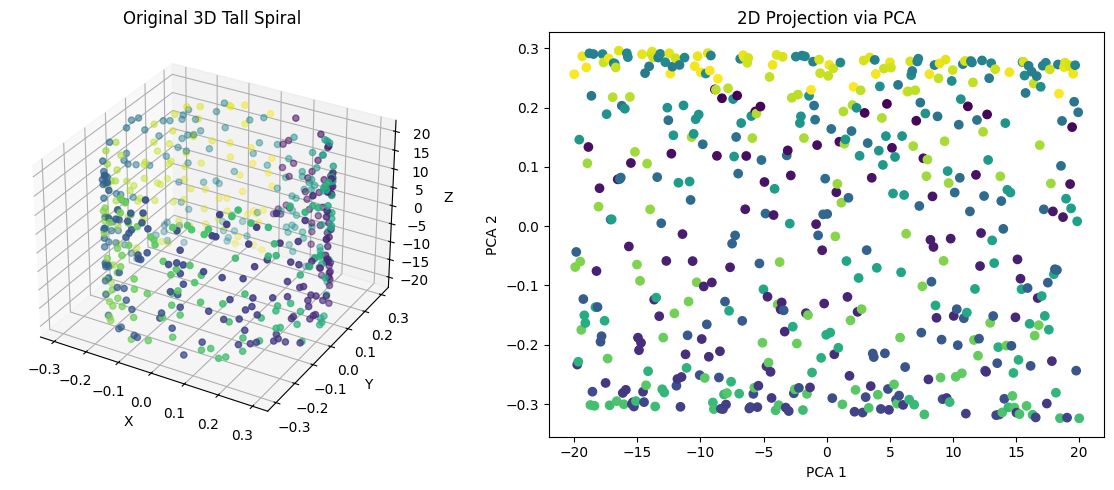

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# generate a simple spiral
n_samples = 500
t = 4 * np.pi * (1 + np.random.rand(n_samples))
z = np.linspace(-20, 20, n_samples)
x = 0.3 * np.sin(t)
y = 0.3 * np.cos(t)
X = np.vstack((x, y, z)).T
color = t  # use different colors for better viz

X_pca = PCA(n_components=2).fit_transform(X)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax1.set_title("Original 3D Tall Spiral")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.viridis)
ax2.set_title("2D Projection via PCA")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


In this case, the points located at Z >= 10 and the points located at Z <= -10 are represented in the same plane.

2. Using the disease.csv dataset to reproduce the following figure

![figure](Fig.png)

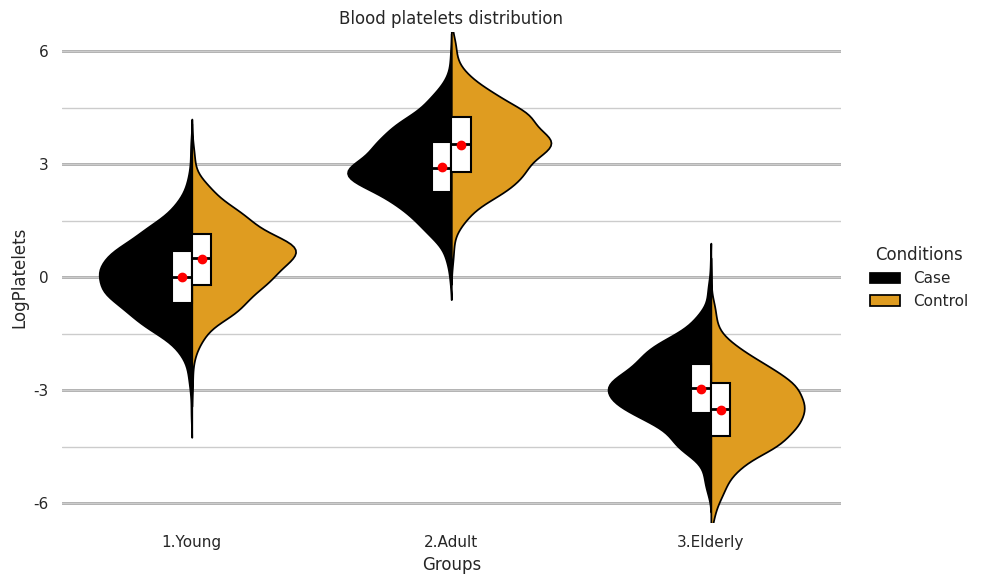

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./disease.csv")

# generate custom labels for x axis
unique_groups = df['Groups'].unique()
label_map = {group: f"{i+1}.{group}" for i, group in enumerate(unique_groups)}
df['Groups_Num'] = df['Groups'].map(label_map)

# set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# create violin plot without inner boxplot
# the latter one will be created independently
ax = sns.violinplot(
    x='Groups_Num',
    y='LogPlatelets',
    hue='Conditions',
    data=df,
    split=True,# in order to have two colors
    inner=None,  # no inner boxplot
    palette={'Case': 'black', 'Control': 'orange'}# associate colors to condition
)

# boxplot generation
sns.boxplot(
    x='Groups_Num',
    y='LogPlatelets',
    hue='Conditions',
    data=df,
    showcaps=False,# variance bar
    boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=0),
    flierprops=dict(marker=''),
    medianprops=dict(color='black', linewidth=2),# this is to color the median line
    meanprops=({"marker":"o","markerfacecolor":"red", "markeredgecolor":"red"}), # red point for the mean
    showmeans=True,
    dodge=True,# to make two boxes for each condition
    width=0.15,
    ax=ax
)

# remove duplicate legends
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[0:2], labels[0:2], title='Conditions', loc='center left', bbox_to_anchor=(1.02, 0.5))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none')
legend.set_frame_on(False)

# --- Y-axis ticks: 9 lines with only 5 labeled (6, 3, 0, -3, -6) ---
yticks = np.linspace(-6, 6, 9)  # 9 evenly spaced ticks from -6 to 6
ax.set_yticks(yticks)

labels_map = {6: "6", 3: "3", 0: "0", -3: "-3", -6: "-6"}
yticklabels = [labels_map.get(round(t), "") for t in yticks]
ax.set_yticklabels(yticklabels)

# customize tick lines width (ensure they are behind the plot)
for t in yticks:
    line_width = 2 if round(t) in labels_map else 0.5
    ax.axhline(y=t, color='gray', linewidth=line_width, alpha=0.7, zorder=0)  # zorder=0 places lines behind

# remove boundary lines
ax.set_ylim(-6.5, 6.5) # so that we don't cut out any data
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(True, axis='y')  # horizontal grid lines only
ax.grid(False, axis='x') # no vertical grid lines

# xxis labels and legend
ax.set_xlabel("Groups")
ax.set_ylabel("LogPlatelets")
plt.title("Blood platelets distribution")

plt.tight_layout()
plt.show()

3.Describe in detail the meaning of the visual encoding
elements and their attributes in the following infographic reporting the
vertical bedrock uplift in Greenland in 2012  

![image](info.png).

The infographic helps viewers quickly grasp how bedrock elevation changed in Greenland in 2012, likely in response to ice melt and glacial retreat. It uses a combination of color gradients, geographical context, and labeled uplift values to convey meaningful geospatial information effectively.

# Section B: Visualization Design & Justification (20 Points)

**Scenario**: You are a data scientist approached by an airline that has shared its flight data with you, including monthly passenger counts from 1949 to 1960.

**Instructions**:  
Using the provided data, complete the following tasks:

- Propose an appropriate visualization to illustrate **seasonal trends** in passenger numbers.
- Analyze and visualize the **trend in passenger numbers from 1949 to 1960**.
- Create visualizations for the **number of passengers per month**, shown both:
  - Across multiple years, and
  - Aggregated (i.e., merged across years).
- Using the `state_flights_1960` dataset, visualize the **net passenger flow for each U.S. state**.
- Identify and describe any **patterns or anomalies** observed in the data.
- Write a **report summarizing your findings**.

> **Note**: Due to space constraints, your report may include **only two figures**, and **both figures combined must not exceed half an A4 page**. You may use **multiple panels** within each figure if needed.



AttributeError: 'MultiPolygon' object has no attribute 'exterior'

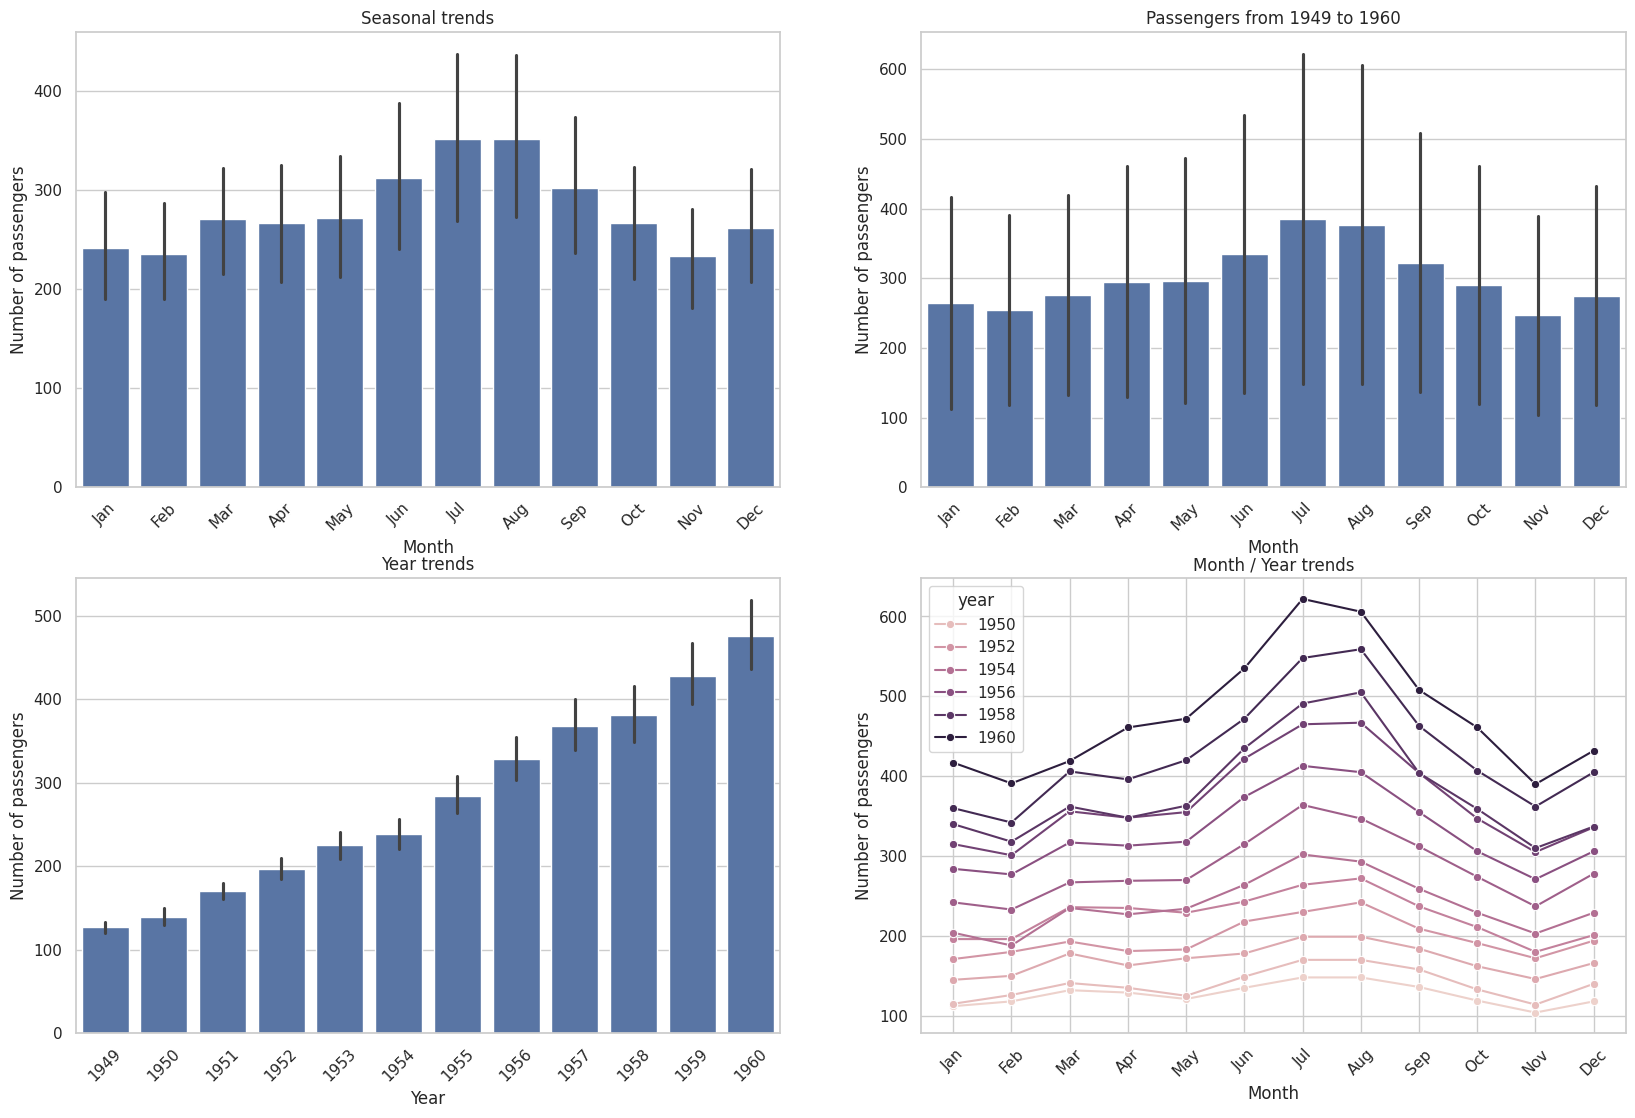

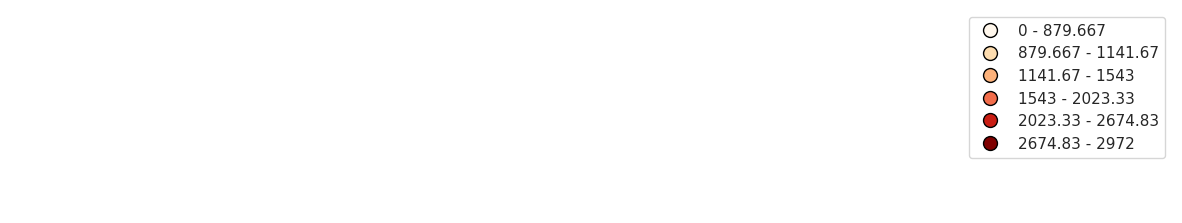

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc
import us 

flights = sns.load_dataset("flights")
flights_state = pd.read_csv("state_flights_1960.csv")

# prepare grid for seaborn plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.set_size_inches(20, 13)
axes = ax.flatten()

seasonal = sns.barplot(data=flights, x="month", y="passengers", ax=axes[0])
seasonal.set_xlabel("Month")
seasonal.set_ylabel("Number of passengers")
seasonal.set_title("Seasonal trends")
seasonal.tick_params(axis='x', rotation=45)


subset_flight = flights[flights["year"].isin([1949, 1960])]
trend_years = sns.barplot(data=subset_flight, x="month", y="passengers", ax=axes[1])
trend_years.set_xlabel("Month")
trend_years.set_ylabel("Number of passengers")
trend_years.set_title("Passengers from 1949 to 1960")
trend_years.tick_params(axis='x', rotation=45)


year_flights = sns.barplot(data=flights, x="year", y="passengers", ax=axes[2])
year_flights.set_xlabel("Year")
year_flights.set_ylabel("Number of passengers")
year_flights.set_title("Year trends")
year_flights.tick_params(axis='x', rotation=45)


year_month_flights = sns.lineplot(data=flights, x="month", y="passengers", hue="year", marker="o", ax=axes[3])
year_month_flights.set_xlabel("Month")
year_month_flights.set_ylabel("Number of passengers")
year_month_flights.set_title("Month / Year trends")
year_month_flights.tick_params(axis='x', rotation=45)


# Load the json file with county coordinates
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us-states-employmentrate.geojson"
states = gpd.read_file(url)

us_state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

flights_state["state_name"] = flights_state["state"].map(us_state_abbrev)

merged = states.merge(flights_state, left_on="state", right_on="state_name")
scheme = mc.Quantiles(merged["inbound_flights"], k=6)

fig, ax = plt.subplots(figsize=(15, 10))
gplt.choropleth(
    merged,
    hue="inbound_flights",
    cmap="OrRd",
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    scheme=scheme,
    ax=ax,
)



plt.tight_layout()
plt.show()